<a href="https://colab.research.google.com/github/xexax/Marketplace_readings/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Historical Data Sample:
    product_code      month       sales
120            C 2023-01-01  101.301443
121            C 2023-02-01   98.209067
122            C 2023-03-01  102.792092
123            C 2023-04-01   89.085544
124            C 2023-05-01  103.001754
125            C 2023-06-01   98.556281

Forecast Data:
   product_code      month    forecast
0             A 2023-07-01  145.035685
1             A 2023-08-01  145.035685
2             A 2023-09-01  145.035685
3             A 2023-10-01  145.035685
4             A 2023-11-01  145.035685
5             A 2023-12-01  145.035685
6             B 2023-07-01  132.425680
7             B 2023-08-01  132.425680
8             B 2023-09-01  132.425680
9             B 2023-10-01  132.425680
10            B 2023-11-01  132.425680
11            B 2023-12-01  132.425680
12            C 2023-07-01   98.824364
13            C 2023-08-01   98.824364
14            C 2023-09-01   98.824364
15            C 2023-10-01   98.824364
16            C 2

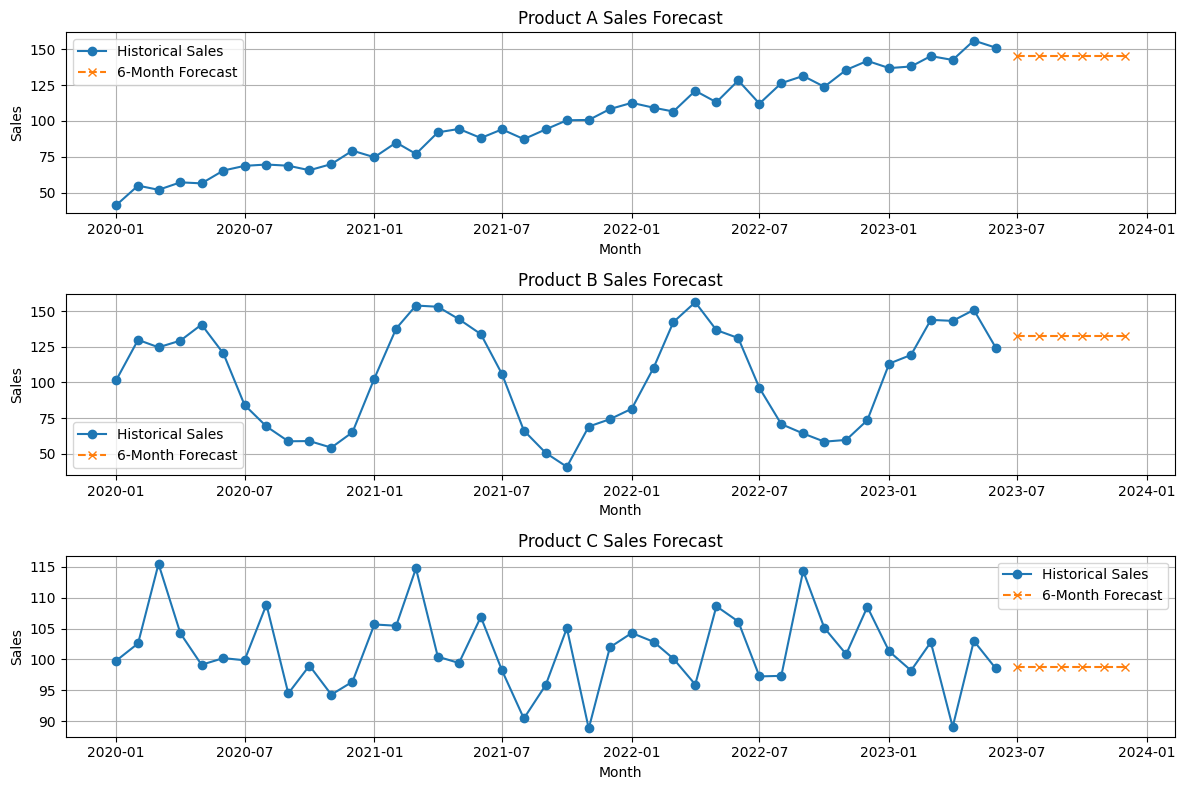

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data():
    """Generate synthetic sales data with trends and seasonality"""
    products = ['A', 'B', 'C']
    dates = pd.date_range(start='2020-01-01', end='2023-06-01', freq='MS')
    n_periods = len(dates)
    sales_data = []

    for product in products:
        for i, date in enumerate(dates):
            if product == 'A':
                # Linear increasing trend
                sales = 50 + (100 / n_periods) * i + np.random.normal(0, 5)
            elif product == 'B':
                # Seasonal pattern
                sales = 100 + 50 * np.sin(2 * np.pi * i / 12) + np.random.normal(0, 10)
            else:
                # Stable trend with noise
                sales = 100 + np.random.normal(0, 7)
            sales_data.append([product, date, sales])

    return pd.DataFrame(sales_data, columns=['product_code', 'month', 'sales'])

def forecast_pipeline(df):
    """Main forecasting pipeline"""
    # Data preparation
    df['month'] = pd.to_datetime(df['month'])
    df = df.sort_values(['product_code', 'month'])

    # Generate forecasts
    forecast_list = []
    for product in df['product_code'].unique():
        product_data = df[df['product_code'] == product]

        # Calculate 6-month moving average
        last_six = product_data.tail(6)['sales']
        forecast_value = last_six.mean()

        # Create forecast dates
        last_date = product_data['month'].max()
        forecast_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=6,
            freq='MS'
        )

        # Store forecasts
        for date in forecast_dates:
            forecast_list.append({
                'product_code': product,
                'month': date,
                'forecast': forecast_value
            })

    forecast_df = pd.DataFrame(forecast_list)

    # Combine historical data with forecasts
    combined_df = pd.merge(
        df,
        forecast_df,
        on=['product_code', 'month'],
        how='outer'
    )

    return combined_df, forecast_df

def visualize_results(combined_df):
    """Visualize historical data and forecasts"""
    plt.figure(figsize=(12, 8))

    for idx, product in enumerate(combined_df['product_code'].unique(), 1):
        plt.subplot(3, 1, idx)
        product_data = combined_df[combined_df['product_code'] == product]

        # Plot historical data
        plt.plot(
            product_data['month'],
            product_data['sales'],
            label='Historical Sales',
            marker='o'
        )

        # Plot forecast
        plt.plot(
            product_data['month'],
            product_data['forecast'],
            label='6-Month Forecast',
            linestyle='--',
            marker='x'
        )

        plt.title(f'Product {product} Sales Forecast')
        plt.xlabel('Month')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate and process data
    synthetic_data = generate_synthetic_data()
    results_df, forecast_df = forecast_pipeline(synthetic_data)

    # Show results
    print("Historical Data Sample:")
    print(synthetic_data.tail(6))

    print("\nForecast Data:")
    print(forecast_df)

    visualize_results(results_df)

<ipython-input-2-33110f343e7a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Historical Data Sample:
    product_code      month       sales
132            C 2023-01-01  103.097073
133            C 2023-02-01   96.528717
134            C 2023-03-01   99.786690
135            C 2023-04-01  105.787539
136            C 2023-05-01  101.811189
137            C 2023-06-01  102.246513

Forecast vs Actuals:
   product_code      month    forecast       sales      error  abs_pct_error
0             A 2023-07-01  132.558186  135.367618  -2.809432       2.075409
1             A 2023-08-01  132.558186  143.900834 -11.342648       7.882267
2             A 2023-09-01  132.558186  144.610137 -12.051951       8.334098
3             A 2023-10-01  132.558186  135.863029  -3.304843       2.432482
4             A 2023-11-01  132.558186  146.011969 -13.453783       9.214164
5             A 2023-12-01  132.558186  144.905287 -12.347101       8.520808
6             B 2023-07-01  134.376052  102.980036  31.396016      30.487478
7             B 2023-08-01  134.376052   76.807704  57.568

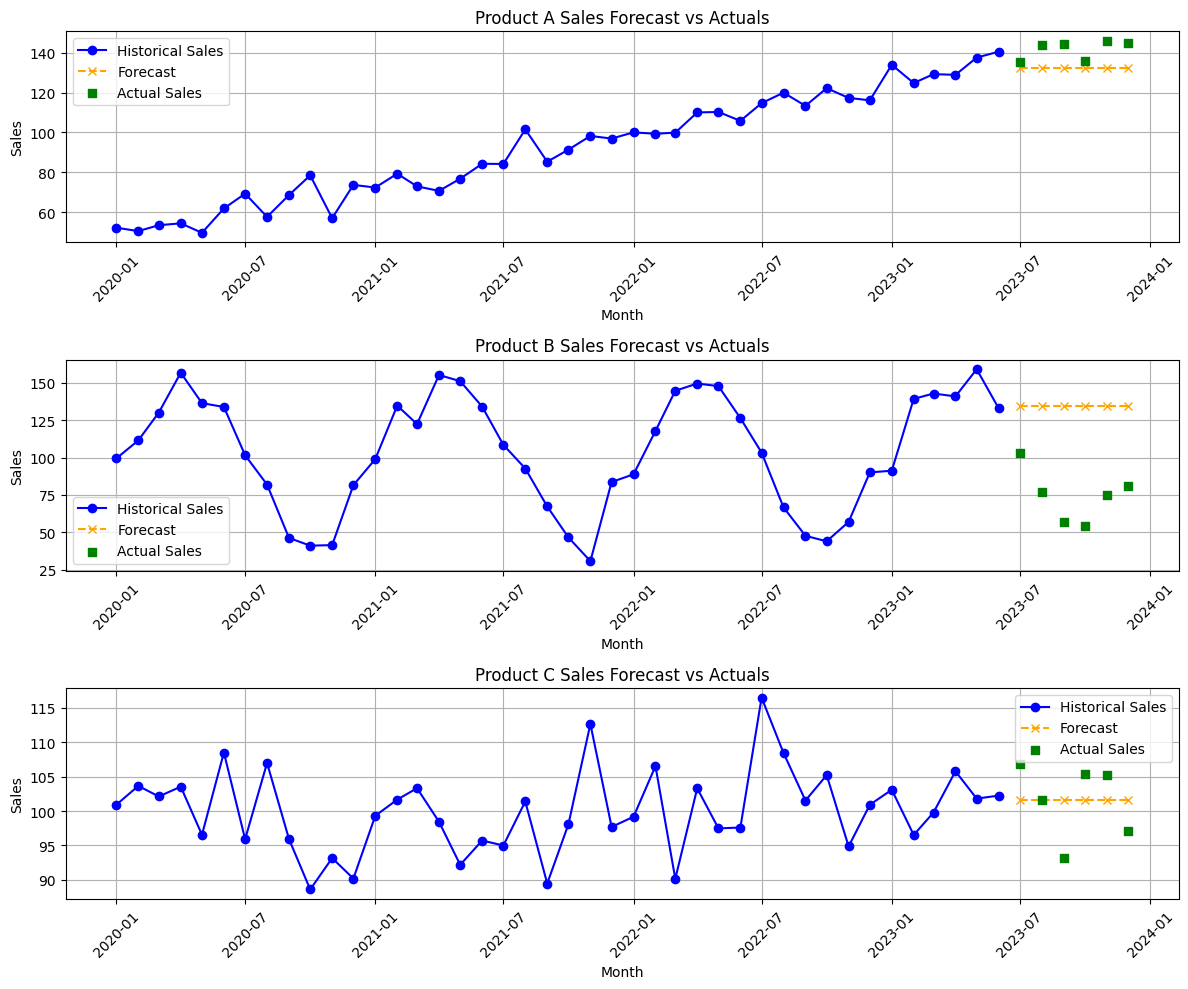

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data():
    """Generate synthetic sales data with trends and seasonality"""
    products = ['A', 'B', 'C']
    dates = pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS')
    n_periods = len(dates)
    sales_data = []

    for product in products:
        for i, date in enumerate(dates):
            if product == 'A':
                # Linear increasing trend
                base = 50 + (100 / n_periods) * i
                sales = base + np.random.normal(0, 5)
            elif product == 'B':
                # Seasonal pattern
                seasonal = 50 * np.sin(2 * np.pi * i / 12)
                sales = 100 + seasonal + np.random.normal(0, 10)
            else:
                # Stable trend with noise
                sales = 100 + np.random.normal(0, 7)
            sales_data.append([product, date, sales])

    return pd.DataFrame(sales_data, columns=['product_code', 'month', 'sales'])

def forecast_pipeline(df):
    """Main forecasting pipeline"""
    # Data preparation
    df['month'] = pd.to_datetime(df['month'])
    df = df.sort_values(['product_code', 'month'])

    # Generate forecasts
    forecast_list = []
    for product in df['product_code'].unique():
        product_data = df[df['product_code'] == product]

        # Calculate 6-month moving average using historical data only
        last_six = product_data[product_data['month'] <= '2023-06-01'].tail(6)['sales']
        forecast_value = last_six.mean()

        # Create forecast dates
        last_date = pd.to_datetime('2023-06-01')
        forecast_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=6,
            freq='MS'
        )

        # Store forecasts
        for date in forecast_dates:
            forecast_list.append({
                'product_code': product,
                'month': date,
                'forecast': forecast_value
            })

    forecast_df = pd.DataFrame(forecast_list)
    return forecast_df

def calculate_metrics(forecast_df, actuals_df):
    """Calculate bias and MAPE metrics"""
    merged_df = forecast_df.merge(
        actuals_df,
        on=['product_code', 'month'],
        how='left'
    )

    # Calculate error metrics
    merged_df['error'] = merged_df['forecast'] - merged_df['sales']
    merged_df['abs_pct_error'] = (np.abs(merged_df['error']) / merged_df['sales']) * 100

    # Create summary table
    summary_table = merged_df.groupby('product_code').agg(
        bias=('error', 'mean'),
        mape=('abs_pct_error', 'mean')
    ).reset_index()

    return merged_df, summary_table

def visualize_results(merged_df, historical_df):
    """Visualize historical data, forecasts, and actuals"""
    plt.figure(figsize=(12, 10))

    for idx, product in enumerate(merged_df['product_code'].unique(), 1):
        plt.subplot(3, 1, idx)

        # Historical data
        product_hist = historical_df[historical_df['product_code'] == product]
        plt.plot(
            product_hist['month'],
            product_hist['sales'],
            label='Historical Sales',
            marker='o',
            color='blue'
        )

        # Forecasts
        product_fcst = merged_df[merged_df['product_code'] == product]
        plt.plot(
            product_fcst['month'],
            product_fcst['forecast'],
            label='Forecast',
            linestyle='--',
            marker='x',
            color='orange'
        )

        # Actuals
        plt.scatter(
            product_fcst['month'],
            product_fcst['sales'],
            label='Actual Sales',
            marker='s',
            color='green',
            zorder=3
        )

        plt.title(f'Product {product} Sales Forecast vs Actuals')
        plt.xlabel('Month')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate complete dataset
    full_data = generate_synthetic_data()

    # Split into historical and actuals
    historical_data = full_data[full_data['month'] <= '2023-06-01']
    future_actuals = full_data[full_data['month'] > '2023-06-01']

    # Generate forecasts
    forecast_df = forecast_pipeline(historical_data)

    # Calculate metrics
    metrics_df, summary_table = calculate_metrics(forecast_df, future_actuals)

    # Show results
    print("Historical Data Sample:")
    print(historical_data.tail(6))

    print("\nForecast vs Actuals:")
    print(metrics_df[['product_code', 'month', 'forecast', 'sales', 'error', 'abs_pct_error']])

    print("\nPerformance Summary:")
    print(summary_table)

    # Visualize results
    visualize_results(metrics_df, historical_data)